In [15]:
# –ò–º–ø–æ—Ä—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# –§–∏–∫—Å–∞—Ü–∏—è random_state –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [16]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –æ—á–∏—â–µ–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ –∏–∑ –õ–†-1
df = pd.read_csv('../data/raw/diabetes_clean.csv')

# –í—ã–≤–æ–¥ –æ—Å–Ω–æ–≤–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –¥–∞–Ω–Ω—ã—Ö
print("–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞:", df.shape)
print("\n–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:")
df.head()

–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: (768, 9)

–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.133413  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.133413  0.171779   
2     0.470588  0.896774       0.408163       0.239130  0.133413  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.118840  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.146484  0.509202   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.479078  0.200000        1

In [17]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –¥–∞–Ω–Ω—ã—Ö
print("–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞—Ç–∞—Å–µ—Ç–µ:")
print(df.info())
print("\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–∞–Ω–Ω—ã—Ö:")
df.describe()


–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞—Ç–∞—Å–µ—Ç–µ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB
None

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–∞–Ω–Ω—ã—Ö:


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.225720    0.501205       0.493638       0.237680    0.133042   
std       0.196715    0.196361       0.119355       0.080895    0.009512   
min       0.000000    0.000000       0.163265       0.081522    0.118840   
25%       0.058824    0.359677       0.408163       0.195652    0.129207   
50%       0.176471    0.470968       0.491863       0.239130    0.133413   
75%       0.352941    0.620968       0.571429       0.271739    0.136118   
max       0.794118    1.000000       0.816327       0.385870    0.146484   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean     0.290299                  0.162645    0.203331    0.348958  
std      0.136349                  0.121945    0.193807    0.476951  
min      0.000000                  0.000000    0.000000    0.000000  
25%      0.190184                  0.070773    0.050000    0.000000  
50%      0.290389                  0.125747    0.133333    0.000000  
75%      0.376278                  0.234095    0.333333    1.000000  
max      0.655419                  0.479078    0.758333    1.000000

–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –æ–±—â—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –¥–∞—Ç–∞—Å–µ—Ç–µ - —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö, –Ω–∞–ª–∏—á–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤, —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏.
–≠—Ç–æ –ø–æ–º–æ–≥–∞–µ—Ç –ø–æ–Ω—è—Ç—å —Å—Ç—Ä—É–∫—Ç—É—Ä—É –¥–∞–Ω–Ω—ã—Ö –∏ –≤—ã—è–≤–∏—Ç—å –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–µ –ø—Ä–æ–±–ª–µ–º—ã, —Ç–∞–∫–∏–µ –∫–∞–∫ –≤—ã–±—Ä–æ—Å—ã –∏–ª–∏ –Ω–µ—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è –≤ —Ç–∏–ø–∞—Ö –¥–∞–Ω–Ω—ã—Ö.

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (Outcome):
Outcome
0    500
1    268
Name: count, dtype: int64

–î–æ–ª–∏ –∫–ª–∞—Å—Å–æ–≤:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


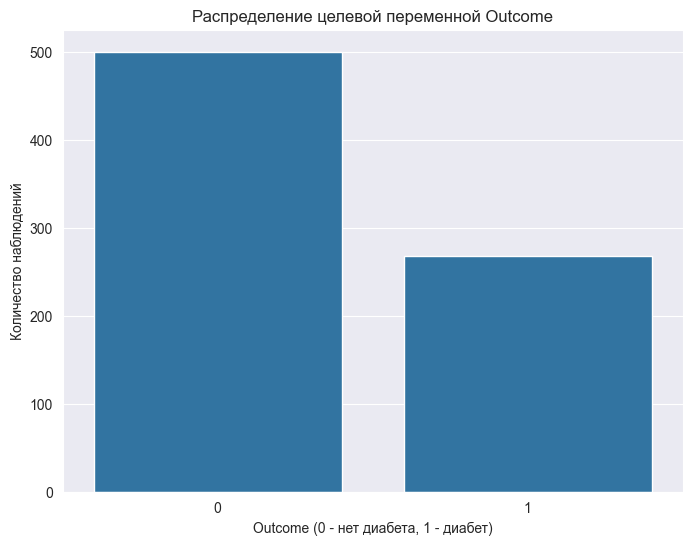

In [18]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –±–∞–ª–∞–Ω—Å–∞ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
print("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (Outcome):")
print(df['Outcome'].value_counts())
print("\n–î–æ–ª–∏ –∫–ª–∞—Å—Å–æ–≤:")
print(df['Outcome'].value_counts(normalize=True))

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Outcome')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π Outcome')
plt.xlabel('Outcome (0 - –Ω–µ—Ç –¥–∏–∞–±–µ—Ç–∞, 1 - –¥–∏–∞–±–µ—Ç)')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π')
plt.show()


–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –¥–ª—è –ø–æ–Ω–∏–º–∞–Ω–∏—è –±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤.
–≠—Ç–æ –≤–∞–∂–Ω–æ –¥–ª—è –≤—ã–±–æ—Ä–∞ –º–µ—Ç—Ä–∏–∫ –∏ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ–º–æ–≥–∞–µ—Ç –Ω–∞–≥–ª—è–¥–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å –¥–∏—Å–±–∞–ª–∞–Ω—Å.

In [19]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# –°–ø–∏—Å–æ–∫ –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–≤—Å–µ —á–∏—Å–ª–æ–≤—ã–µ)
feature_names = X.columns.tolist()
print("–°–ø–∏—Å–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:", feature_names)


–°–ø–∏—Å–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


–†–∞–∑–¥–µ–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –º–∞—Ç—Ä–∏—Ü—É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (X) –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é (y).
–°–æ—Ö—Ä–∞–Ω—è–µ–º —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –≤ –ø–∞–π–ø–ª–∞–π–Ω–µ –∏ –∞–Ω–∞–ª–∏–∑–µ.

In [20]:
# –†–∞–∑–¥–µ–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø–æ —Å—Ç—Ä–∞—Ç–µ–≥–∏—è–º –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏
# –ù–∞ –æ—Å–Ω–æ–≤–µ –∞–Ω–∞–ª–∏–∑–∞ –¥–∞–Ω–Ω—ã—Ö –∏–∑ –õ–†-1:

# –ü—Ä–∏–∑–Ω–∞–∫–∏ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏ - –∑–∞–ø–æ–ª–Ω—è–µ–º –º–µ–¥–∏–∞–Ω–æ–π
features_median = ['SkinThickness', 'Insulin']
# –ü—Ä–∏—á–∏–Ω—ã –≤—ã–±–æ—Ä–∞ –º–µ–¥–∏–∞–Ω—ã:
# - SkinThickness: 227 –ø—Ä–æ–ø—É—Å–∫–æ–≤, –∏–º–µ–µ—Ç –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏ –Ω–∞ –∫–æ–Ω—Ü–µ
# - Insulin: 374 –ø—Ä–æ–ø—É—Å–∫–∞, –º–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏–π –±–ª–∏–∑–∫–∏—Ö –∫ –Ω—É–ª—é –∏ –¥–∞–ª–µ–∫–æ –∑–∞ 400, –∞—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
# –ú–µ–¥–∏–∞–Ω–∞ —É—Å—Ç–æ–π—á–∏–≤–∞ –∫ –≤—ã–±—Ä–æ—Å–∞–º –∏ –ª—É—á—à–µ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ

# –ü—Ä–∏–∑–Ω–∞–∫–∏ —Å –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º - –∑–∞–ø–æ–ª–Ω—è–µ–º —Å—Ä–µ–¥–Ω–∏–º
features_mean = ['Glucose', 'BloodPressure', 'BMI']
# –ü—Ä–∏—á–∏–Ω—ã –≤—ã–±–æ—Ä–∞ —Å—Ä–µ–¥–Ω–µ–≥–æ:
# - –≠—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–º–µ—é—Ç –ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
# - –°—Ä–µ–¥–Ω–µ–µ —è–≤–ª—è–µ—Ç—Å—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–π –æ—Ü–µ–Ω–∫–æ–π –¥–ª—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π
# - –û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —Å–∏–ª—å–Ω—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤

# –ü—Ä–∏–∑–Ω–∞–∫–∏ –±–µ–∑ –ø—Ä–æ–ø—É—Å–∫–æ–≤ - —Ç–æ–ª—å–∫–æ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
features_no_missing = ['Pregnancies', 'DiabetesPedigreeFunction', 'Age']
# –ü—Ä–∏—á–∏–Ω—ã –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è –∏–º–ø—å—é—Ç–µ—Ä–∞:
# - –í –æ—á–∏—â–µ–Ω–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ —ç—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤
# - Pregnancies –∏ Age - –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
# - DiabetesPedigreeFunction –∏–º–µ–µ—Ç —É–Ω–∏–∫–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ

# –°–æ–∑–¥–∞–µ–º –æ—Ç–¥–µ–ª—å–Ω—ã–µ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä—ã –¥–ª—è –∫–∞–∂–¥–æ–π –≥—Ä—É–ø–ø—ã
median_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # –ú–µ–¥–∏–∞–Ω–∞ –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏
    ('scaler', MinMaxScaler())  # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –≤ [0,1]
])

mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),    # –°—Ä–µ–¥–Ω–µ–µ –¥–ª—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π
    ('scaler', MinMaxScaler())  # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –≤ [0,1]
])

no_missing_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())  # –¢–æ–ª—å–∫–æ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –±–µ–∑ –ø—Ä–æ–ø—É—Å–∫–æ–≤
])

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –≤ ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('median_imputer', median_transformer, features_median),
        ('mean_imputer', mean_transformer, features_mean),
        ('no_imputer', no_missing_transformer, features_no_missing)
    ])

print("–°—Ç—Ä—É–∫—Ç—É—Ä–∞ –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–æ—Ä–∞ —Å–æ–∑–¥–∞–Ω–∞ —É—Å–ø–µ—à–Ω–æ")

–°—Ç—Ä—É–∫—Ç—É—Ä–∞ –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–æ—Ä–∞ —Å–æ–∑–¥–∞–Ω–∞ —É—Å–ø–µ—à–Ω–æ



–ü–æ—è—Å–Ω–µ–Ω–∏–µ: –°–æ–∑–¥–∞–µ–º —Å–ª–æ–∂–Ω—ã–π –ø–∞–π–ø–ª–∞–π–Ω –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥–∞ —Å —Ä–∞–∑–Ω—ã–º–∏ —Å—Ç—Ä–∞—Ç–µ–≥–∏—è–º–∏ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –≥—Ä—É–ø–ø –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
–≠—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å –¥–∞–Ω–Ω—ã–µ —Å —É—á–µ—Ç–æ–º –∏—Ö —Å–ø–µ—Ü–∏—Ñ–∏–∫–∏:

    –î–ª—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏ –∏—Å–ø–æ–ª—å–∑—É–µ–º –º–µ–¥–∏–∞–Ω—É (—É—Å—Ç–æ–π—á–∏–≤–∞ –∫ –≤—ã–±—Ä–æ—Å–∞–º)

    –î–ª—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏—Å–ø–æ–ª—å–∑—É–µ–º —Å—Ä–µ–¥–Ω–µ–µ (—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–∞—è –æ—Ü–µ–Ω–∫–∞)

    –î–ª—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –±–µ–∑ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø—Ä–∏–º–µ–Ω—è–µ–º —Ç–æ–ª—å–∫–æ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é
    
–¢–∞–∫–æ–π –ø–æ–¥—Ö–æ–¥ –º–∏–Ω–∏–º–∏–∑–∏—Ä—É–µ—Ç –∏—Å–∫–∞–∂–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –∏ —É–ª—É—á—à–∞–µ—Ç –∫–∞—á–µ—Å—Ç–≤–æ –±—É–¥—É—â–∏—Ö –º–æ–¥–µ–ª–µ–π.

In [21]:
# –°—Ç—Ä–∞—Ç–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Ä–∞–∑–±–∏–µ–Ω–∏–µ –Ω–∞ train/valid/test –≤ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–∏ 60/20/20
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y,  # —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏—è –ø–æ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
    random_state=RANDOM_STATE
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, 
    test_size=0.25,  # 0.25 –æ—Ç 80% = 20% –æ—Ç –æ–±—â–µ–≥–æ –æ–±—ä–µ–º–∞
    stratify=y_temp,  # —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏—è
    random_state=RANDOM_STATE
)

print("–†–∞–∑–º–µ—Ä—ã –≤—ã–±–æ—Ä–æ–∫:")
print(f"–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞ (train): {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ (valid): {X_valid.shape[0]} samples ({X_valid.shape[0]/len(X)*100:.1f}%)")
print(f"–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞ (test): {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

–†–∞–∑–º–µ—Ä—ã –≤—ã–±–æ—Ä–æ–∫:
–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞ (train): 460 samples (59.9%)
–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ (valid): 154 samples (20.1%)
–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞ (test): 154 samples (20.1%)



–†–∞–∑–±–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é (60%), –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é (20%) –∏ —Ç–µ—Å—Ç–æ–≤—É—é (20%) –≤—ã–±–æ—Ä–∫–∏.
–ò—Å–ø–æ–ª—å–∑—É–µ–º —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏—é –ø–æ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –ø—Ä–æ–ø–æ—Ä—Ü–∏–π –∫–ª–∞—Å—Å–æ–≤ –≤–æ –≤—Å–µ—Ö –≤—ã–±–æ—Ä–∫–∞—Ö.
–≠—Ç–æ –æ—Å–æ–±–µ–Ω–Ω–æ –≤–∞–∂–Ω–æ –ø—Ä–∏ –¥–∏—Å–±–∞–ª–∞–Ω—Å–µ –∫–ª–∞—Å—Å–æ–≤, —á—Ç–æ–±—ã –º–æ–¥–µ–ª–∏ –æ–±—É—á–∞–ª–∏—Å—å –Ω–∞ —Ä–µ–ø—Ä–µ–∑–µ–Ω—Ç–∞—Ç–∏–≤–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

In [22]:
# –û–±—É—á–∞–µ–º –ø–∞–π–ø–ª–∞–π–Ω –¢–û–õ–¨–ö–û –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
print("–û–±—É—á–µ–Ω–∏–µ –ø–∞–π–ø–ª–∞–π–Ω–∞ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö...")
preprocessor.fit(X_train)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤—Å–µ –≤—ã–±–æ—Ä–∫–∏ —Å –ø–æ–º–æ—â—å—é –û–ë–£–ß–ï–ù–ù–û–ì–û –ø–∞–π–ø–ª–∞–π–Ω–∞
X_train_processed = preprocessor.transform(X_train)
X_valid_processed = preprocessor.transform(X_valid) 
X_test_processed = preprocessor.transform(X_test)

print("–ü–∞–π–ø–ª–∞–π–Ω –æ–±—É—á–µ–Ω –Ω–∞ train –∏ –ø—Ä–∏–º–µ–Ω–µ–Ω –∫–æ –≤—Å–µ–º –≤—ã–±–æ—Ä–∫–∞–º")
print(f"–†–∞–∑–º–µ—Ä—ã –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö: train {X_train_processed.shape}, valid {X_valid_processed.shape}, test {X_test_processed.shape}")

–û–±—É—á–µ–Ω–∏–µ –ø–∞–π–ø–ª–∞–π–Ω–∞ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö...
–ü–∞–π–ø–ª–∞–π–Ω –æ–±—É—á–µ–Ω –Ω–∞ train –∏ –ø—Ä–∏–º–µ–Ω–µ–Ω –∫–æ –≤—Å–µ–º –≤—ã–±–æ—Ä–∫–∞–º
–†–∞–∑–º–µ—Ä—ã –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö: train (460, 8), valid (154, 8), test (154, 8)


–û–±—É—á–∞–µ–º –ø–∞–π–ø–ª–∞–π–Ω –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥–∞ –¢–û–õ–¨–ö–û –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –∑–∞—Ç–µ–º –ø—Ä–∏–º–µ–Ω—è–µ–º –µ–≥–æ –∫–æ –≤—Å–µ–º –≤—ã–±–æ—Ä–∫–∞–º.
–≠—Ç–æ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏ –≤–∞–∂–Ω–æ –¥–ª—è –∏–∑–±–µ–∂–∞–Ω–∏—è —É—Ç–µ—á–∫–∏ –¥–∞–Ω–Ω—ã—Ö.
–ú–æ–¥–µ–ª—å –Ω–µ –¥–æ–ª–∂–Ω–∞ "–≤–∏–¥–µ—Ç—å" –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –∏–∑ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –∏–ª–∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–æ–∫ –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–æ—Ä–∞.

In [23]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –≤ —Ä–∞–∑–Ω—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö
def check_stratification(y_train, y_valid, y_test, y_original):
    """–§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏"""
    original_dist = y_original.value_counts(normalize=True)
    train_dist = y_train.value_counts(normalize=True)
    valid_dist = y_valid.value_counts(normalize=True)
    test_dist = y_test.value_counts(normalize=True)
    
    stratification_check = pd.DataFrame({
        'Original': original_dist,
        'Train': train_dist,
        'Valid': valid_dist,
        'Test': test_dist
    })
    
    return stratification_check

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏
strat_check = check_stratification(y_train, y_valid, y_test, y)
print("–ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏ (–¥–æ–ª–∏ –∫–ª–∞—Å—Å–æ–≤):")
print(strat_check)

–ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏ (–¥–æ–ª–∏ –∫–ª–∞—Å—Å–æ–≤):
         Original     Train     Valid      Test
Outcome                                        
0        0.651042  0.652174  0.649351  0.649351
1        0.348958  0.347826  0.350649  0.350649


–ü—Ä–æ–≤–µ—Ä—è–µ–º –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç—å —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏ - —É–±–µ–∂–¥–∞–µ–º—Å—è, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ —Å–æ—Ö—Ä–∞–Ω–∏–ª–æ—Å—å –≤–æ –≤—Å–µ—Ö –≤—ã–±–æ—Ä–∫–∞—Ö.
–≠—Ç–æ –≥–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ—Ç, —á—Ç–æ –º–æ–¥–µ–ª–∏ –±—É–¥—É—Ç –æ–±—É—á–∞—Ç—å—Å—è –Ω–∞ —Ä–µ–ø—Ä–µ–∑–µ–Ω—Ç–∞—Ç–∏–≤–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏ –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –±—É–¥—É—Ç –æ–±—ä–µ–∫—Ç–∏–≤–Ω—ã–º–∏.

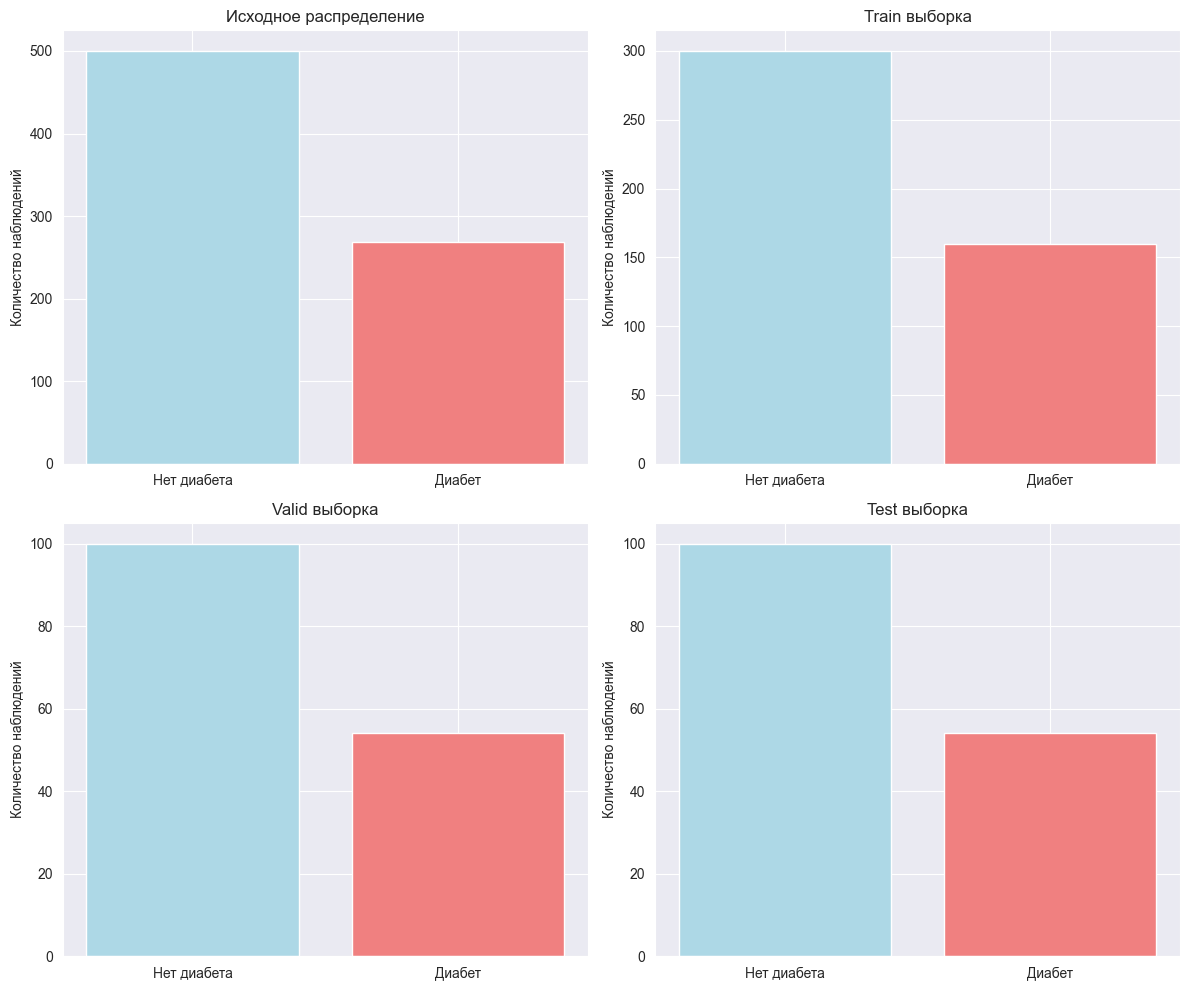

In [24]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö (2 –≥—Ä–∞—Ñ–∏–∫–∞ –≤ —Å—Ç—Ä–æ–∫–µ)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# –ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
axes[0,0].bar(['–ù–µ—Ç –¥–∏–∞–±–µ—Ç–∞', '–î–∏–∞–±–µ—Ç'], [sum(y==0), sum(y==1)], color=['lightblue', 'lightcoral'])
axes[0,0].set_title('–ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')
axes[0,0].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π')

# Train –≤—ã–±–æ—Ä–∫–∞
axes[0,1].bar(['–ù–µ—Ç –¥–∏–∞–±–µ—Ç–∞', '–î–∏–∞–±–µ—Ç'], [sum(y_train==0), sum(y_train==1)], color=['lightblue', 'lightcoral'])
axes[0,1].set_title('Train –≤—ã–±–æ—Ä–∫–∞')
axes[0,1].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π')

# Valid –≤—ã–±–æ—Ä–∫–∞
axes[1,0].bar(['–ù–µ—Ç –¥–∏–∞–±–µ—Ç–∞', '–î–∏–∞–±–µ—Ç'], [sum(y_valid==0), sum(y_valid==1)], color=['lightblue', 'lightcoral'])
axes[1,0].set_title('Valid –≤—ã–±–æ—Ä–∫–∞')
axes[1,0].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π')

# Test –≤—ã–±–æ—Ä–∫–∞
axes[1,1].bar(['–ù–µ—Ç –¥–∏–∞–±–µ—Ç–∞', '–î–∏–∞–±–µ—Ç'], [sum(y_test==0), sum(y_test==1)], color=['lightblue', 'lightcoral'])
axes[1,1].set_title('Test –≤—ã–±–æ—Ä–∫–∞')
axes[1,1].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π')

plt.tight_layout()
plt.show()

–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –≤–æ –≤—Å–µ—Ö –≤—ã–±–æ—Ä–∫–∞—Ö.
–ì—Ä–∞—Ñ–∏–∫–∏ –Ω–∞ —Ä—É—Å—Å–∫–æ–º —è–∑—ã–∫–µ —Å –ø–æ–Ω—è—Ç–Ω—ã–º–∏ –ø–æ–¥–ø–∏—Å—è–º–∏ –ø–æ–º–æ–≥–∞—é—Ç –Ω–∞–≥–ª—è–¥–Ω–æ —É–±–µ–¥–∏—Ç—å—Å—è –≤ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç–∏ —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏.
–ö–æ–º–ø–∞–∫—Ç–Ω–æ–µ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ 2x2 –æ–±–ª–µ–≥—á–∞–µ—Ç —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π.

In [25]:
# –°–æ–∑–¥–∞–Ω–∏–µ –ø–æ–ª–Ω–æ–≥–æ –ø–∞–π–ø–ª–∞–π–Ω–∞ –¥–ª—è –±—É–¥—É—â–∏—Ö –º–æ–¥–µ–ª–µ–π
def create_model_pipeline(model):
    """–°–æ–∑–¥–∞–Ω–∏–µ –ø–æ–ª–Ω–æ–≥–æ –ø–∞–π–ø–ª–∞–π–Ω–∞ —Å –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥–æ–º –∏ –º–æ–¥–µ–ª—å—é"""
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

print("–§—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –ø–∞–π–ø–ª–∞–π–Ω–æ–≤ –≥–æ—Ç–æ–≤–∞")

–§—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –ø–∞–π–ø–ª–∞–π–Ω–æ–≤ –≥–æ—Ç–æ–≤–∞


–°–æ–∑–¥–∞–µ–º —É–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –±—ã—Å—Ç—Ä–æ–≥–æ —Å–æ–∑–¥–∞–Ω–∏—è –ø–∞–π–ø–ª–∞–π–Ω–æ–≤ —Å –ª—é–±—ã–º–∏ –º–æ–¥–µ–ª—è–º–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.
–≠—Ç–æ —É–ø—Ä–æ—Å—Ç–∏—Ç —Ä–∞–±–æ—Ç—É —Å–ª–µ–¥—É—é—â–∏–º —É—á–∞—Å—Ç–Ω–∏–∫–∞–º - –∏–º –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±—É–¥–µ—Ç –ø–µ—Ä–µ–¥–∞—Ç—å –º–æ–¥–µ–ª—å –≤ —ç—Ç—É —Ñ—É–Ω–∫—Ü–∏—é.

In [26]:
# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Å–ª–µ–¥—É—é—â–∏—Ö —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤
data_split = {
    'X_train': X_train,
    'X_valid': X_valid, 
    'X_test': X_test,
    'y_train': y_train,
    'y_valid': y_valid,
    'y_test': y_test,
    'X_train_processed': X_train_processed,
    'X_valid_processed': X_valid_processed,
    'X_test_processed': X_test_processed,
    'feature_names': feature_names,
    'preprocessor': preprocessor
}

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –≤ —Ñ–∞–π–ª
import pickle

with open('../data/interim/data_split.pkl', 'wb') as f:
    pickle.dump(data_split, f)

print("–†–∞–∑–¥–µ–ª–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ —Ñ–∞–π–ª 'data_split.pkl'")

–†–∞–∑–¥–µ–ª–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ —Ñ–∞–π–ª 'data_split.pkl'



–°–æ—Ö—Ä–∞–Ω—è–µ–º –≤—Å–µ –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∏ –æ–±—ä–µ–∫—Ç—ã –≤ —Ñ–∞–π–ª –¥–ª—è –ø–µ—Ä–µ–¥–∞—á–∏ —Å–ª–µ–¥—É—é—â–∏–º —É—á–∞—Å—Ç–Ω–∏–∫–∞–º –ø—Ä–æ–µ–∫—Ç–∞.
–≠—Ç–æ –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç –ø—Ä–µ–µ–º—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç—å —Ä–∞–±–æ—Ç—ã –∏ –∏—Å–∫–ª—é—á–∞–µ—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –ø–æ–≤—Ç–æ—Ä–Ω–æ–π –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –¥–∞–Ω–Ω—ã—Ö.

In [27]:
print("=" * 50)
print("–û–¢–ß–ï–¢ –£–ß–ê–°–¢–ù–ò–ö–ê 1: –ü–û–î–ì–û–¢–û–í–ö–ê –î–ê–ù–ù–´–•")
print("=" * 50)

print("\n‚úÖ –í–´–ü–û–õ–ù–ï–ù–ù–´–ï –ó–ê–î–ê–ß–ò:")
print("1. –°–æ–∑–¥–∞–Ω —Ä–µ–ø–æ–∑–∏—Ç–æ—Ä–∏–π –ø—Ä–æ–µ–∫—Ç–∞ (–Ω–æ—É—Ç–±—É–∫)")
print("2. –ó–∞–≥—Ä—É–∂–µ–Ω –æ—á–∏—â–µ–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç –∏–∑ –õ–†-1")
print("3. –°–æ–∑–¥–∞–Ω sklearn Pipeline —Å ColumnTransformer —Å —Ä–∞–∑–Ω—ã–º–∏ —Å—Ç—Ä–∞—Ç–µ–≥–∏—è–º–∏ –∏–º–ø—å—é—Ç–∞—Ü–∏–∏")
print("4. –í—ã–ø–æ–ª–Ω–µ–Ω–æ —Å—Ç—Ä–∞—Ç–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Ä–∞–∑–±–∏–µ–Ω–∏–µ 60/20/20")
print("5. –ó–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω random_state = 42")
print("6. –ü–∞–π–ø–ª–∞–π–Ω –æ–±—É—á–µ–Ω –Ω–∞ train –∏ –ø—Ä–∏–º–µ–Ω–µ–Ω –∫–æ –≤—Å–µ–º –≤—ã–±–æ—Ä–∫–∞–º")
print("7. –ü—Ä–æ–≤–µ—Ä–µ–Ω–∞ —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏—è –¥–ª—è –¥–∏—Å–±–∞–ª–∞–Ω—Å–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤")
print("8. –î–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –¥–ª—è —Å–ª–µ–¥—É—é—â–∏—Ö —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤")

print("\nüìä –°–¢–ê–¢–ò–°–¢–ò–ö–ê –î–ê–ù–ù–´–•:")
print(f"–û–±—â–∏–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: {df.shape}")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {len(feature_names)}")
print(f"–†–∞–∑–º–µ—Ä train: {X_train.shape} ({len(y_train)/len(df)*100:.1f}%)")
print(f"–†–∞–∑–º–µ—Ä valid: {X_valid.shape} ({len(y_valid)/len(df)*100:.1f}%)") 
print(f"–†–∞–∑–º–µ—Ä test: {X_test.shape} ({len(y_test)/len(df)*100:.1f}%)")

print("\nüéØ –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –¶–ï–õ–ï–í–û–ô –ü–ï–†–ï–ú–ï–ù–ù–û–ô:")
print(f"–ö–ª–∞—Å—Å 0 (–Ω–µ—Ç –¥–∏–∞–±–µ—Ç–∞): {sum(y == 0)} ({sum(y == 0)/len(y)*100:.1f}%)")
print(f"–ö–ª–∞—Å—Å 1 (–¥–∏–∞–±–µ—Ç): {sum(y == 1)} ({sum(y == 1)/len(y)*100:.1f}%)")

print("\nüîß –ù–ê–°–¢–†–û–ô–ö–ò –ü–†–ï–ü–†–û–¶–ï–°–°–ò–ù–ì–ê:")
print("‚Ä¢ SkinThickness, Insulin: –∏–º–ø—å—é—Ç–∞—Ü–∏—è –º–µ–¥–∏–∞–Ω–æ–π + –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è (–∏–∑-–∑–∞ –≤—ã–±—Ä–æ—Å–æ–≤)")
print("‚Ä¢ Glucose, BloodPressure, BMI: –∏–º–ø—å—é—Ç–∞—Ü–∏—è —Å—Ä–µ–¥–Ω–∏–º + –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è (–Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ)")
print("‚Ä¢ Pregnancies, DiabetesPedigreeFunction, Age: —Ç–æ–ª—å–∫–æ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è (–Ω–µ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤)")
print("‚Ä¢ –°—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏—è: –≤–∫–ª—é—á–µ–Ω–∞")

print("\nüìÅ –°–û–•–†–ê–ù–ï–ù–ù–´–ï –§–ê–ô–õ–´:")
print("1. diabetes_clean.csv - –∏—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ")
print("2. data_split.pkl - —Ä–∞–∑–¥–µ–ª–µ–Ω–Ω—ã–µ –∏ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –¥–ª—è —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤ 2-5")

print("\n‚û°Ô∏è –î–ê–õ–¨–ù–ï–ô–®–ò–ï –î–ï–ô–°–¢–í–ò–Ø:")
print("–£—á–∞—Å—Ç–Ω–∏–∫ 2 –º–æ–∂–µ—Ç –ø—Ä–∏—Å—Ç—É–ø–∞—Ç—å –∫ –æ–±—É—á–µ–Ω–∏—é –±–∞–∑–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π –Ω–∞ –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.")

–û–¢–ß–ï–¢ –£–ß–ê–°–¢–ù–ò–ö–ê 1: –ü–û–î–ì–û–¢–û–í–ö–ê –î–ê–ù–ù–´–•

‚úÖ –í–´–ü–û–õ–ù–ï–ù–ù–´–ï –ó–ê–î–ê–ß–ò:
1. –°–æ–∑–¥–∞–Ω —Ä–µ–ø–æ–∑–∏—Ç–æ—Ä–∏–π –ø—Ä–æ–µ–∫—Ç–∞ (–Ω–æ—É—Ç–±—É–∫)
2. –ó–∞–≥—Ä—É–∂–µ–Ω –æ—á–∏—â–µ–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç –∏–∑ –õ–†-1
3. –°–æ–∑–¥–∞–Ω sklearn Pipeline —Å ColumnTransformer —Å —Ä–∞–∑–Ω—ã–º–∏ —Å—Ç—Ä–∞—Ç–µ–≥–∏—è–º–∏ –∏–º–ø—å—é—Ç–∞—Ü–∏–∏
4. –í—ã–ø–æ–ª–Ω–µ–Ω–æ —Å—Ç—Ä–∞—Ç–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Ä–∞–∑–±–∏–µ–Ω–∏–µ 60/20/20
5. –ó–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω random_state = 42
6. –ü–∞–π–ø–ª–∞–π–Ω –æ–±—É—á–µ–Ω –Ω–∞ train –∏ –ø—Ä–∏–º–µ–Ω–µ–Ω –∫–æ –≤—Å–µ–º –≤—ã–±–æ—Ä–∫–∞–º
7. –ü—Ä–æ–≤–µ—Ä–µ–Ω–∞ —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏—è –¥–ª—è –¥–∏—Å–±–∞–ª–∞–Ω—Å–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤
8. –î–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –¥–ª—è —Å–ª–µ–¥—É—é—â–∏—Ö —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤

üìä –°–¢–ê–¢–ò–°–¢–ò–ö–ê –î–ê–ù–ù–´–•:
–û–±—â–∏–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: (768, 9)
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 8
–†–∞–∑–º–µ—Ä train: (460, 8) (59.9%)
–†–∞–∑–º–µ—Ä valid: (154, 8) (20.1%)
–†–∞–∑–º–µ—Ä test: (154